In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import pickle
import sklearn

In [217]:
df = pd.read_csv('mood_data.csv')

In [218]:
df.shape

(75, 6)

In [219]:
df.head()

,Sleep_Hours,Screen_Time_Hours,Exercise_Minutes,Social_Interaction_Hours,Food_Quality,Mood_Score
0,7.7,7.6,24.0,3.3,1,3.24
1,6.8,6.2,25.0,2.1,4,4.63
2,8.0,5.4,10.0,0.7,2,3.62
3,9.3,6.2,23.0,1.1,5,7.20
4,6.6,2.0,24.0,2.8,1,5.97


In [220]:
df.isnull().sum()

Sleep_Hours                 0
Screen_Time_Hours           0
Exercise_Minutes            0
Social_Interaction_Hours    0
Food_Quality                0
Mood_Score                  0
dtype: int64

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sleep_Hours               75 non-null     float64
 1   Screen_Time_Hours         75 non-null     float64
 2   Exercise_Minutes          75 non-null     float64
 3   Social_Interaction_Hours  75 non-null     float64
 4   Food_Quality              75 non-null     int64  
 5   Mood_Score                75 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 3.6 KB


In [222]:
df.describe()

,Sleep_Hours,Screen_Time_Hours,Exercise_Minutes,Social_Interaction_Hours,Food_Quality,Mood_Score
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,6.826667,5.901333,22.253333,2.020000,2.986667,5.436267
std,1.434360,1.859417,13.972070,1.155948,1.502191,1.882824
min,3.100000,2.000000,0.000000,0.000000,1.000000,1.220000
25%,6.000000,4.750000,9.500000,1.200000,2.000000,4.320000
50%,6.800000,6.000000,24.000000,2.100000,3.000000,5.550000
75%,7.750000,6.850000,30.000000,2.800000,4.000000,6.820000
max,9.800000,10.900000,60.000000,4.600000,5.000000,10.000000


In [223]:
df.corr()

,Sleep_Hours,Screen_Time_Hours,Exercise_Minutes,Social_Interaction_Hours,Food_Quality,Mood_Score
Sleep_Hours,1.000000,-0.077130,0.009975,0.141489,-0.084501,0.404645
Screen_Time_Hours,-0.077130,1.000000,-0.018167,-0.033334,0.159661,-0.371723
Exercise_Minutes,0.009975,-0.018167,1.000000,0.176811,-0.138908,0.410194
Social_Interaction_Hours,0.141489,-0.033334,0.176811,1.000000,-0.031752,0.448236
Food_Quality,-0.084501,0.159661,-0.138908,-0.031752,1.000000,0.297643
Mood_Score,0.404645,-0.371723,0.410194,0.448236,0.297643,1.000000


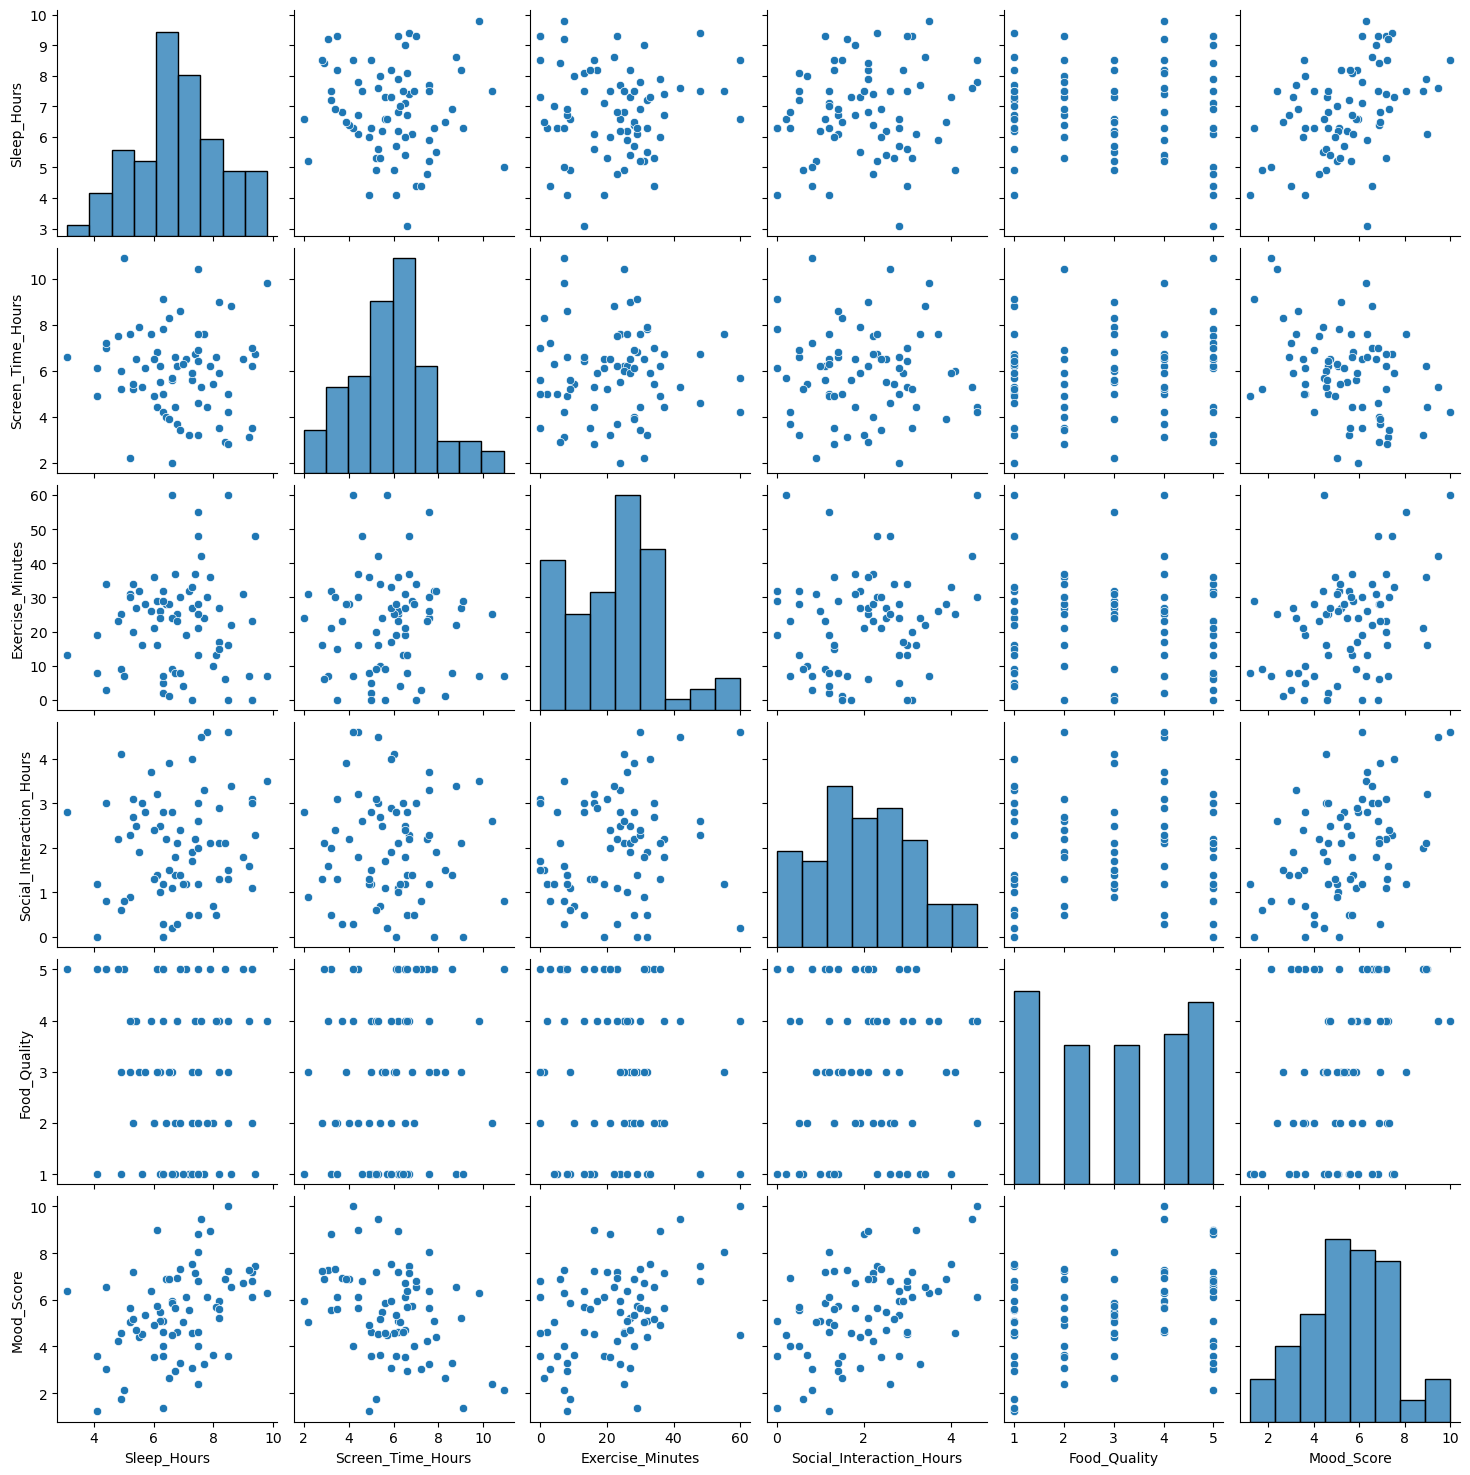

In [224]:
sns.pairplot(df)

In [225]:
df.head(1)

,Sleep_Hours,Screen_Time_Hours,Exercise_Minutes,Social_Interaction_Hours,Food_Quality,Mood_Score
0,7.7,7.6,24.0,3.3,1,3.24


Text(0, 0.5, 'Mood_Score')

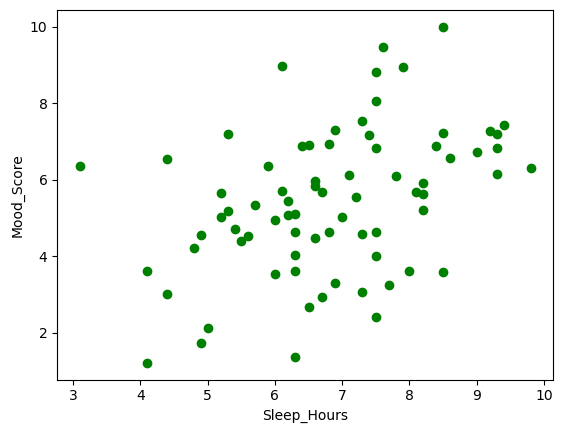

In [226]:
plt.scatter(df['Sleep_Hours'],df['Mood_Score'], color = 'g')
plt.xlabel("Sleep_Hours")
plt.ylabel("Mood_Score")

Text(0, 0.5, 'Mood_Score')

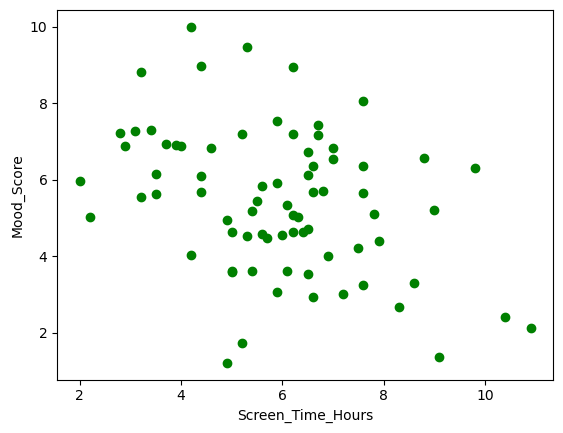

In [227]:
plt.scatter(df['Screen_Time_Hours'],df['Mood_Score'], color = 'g')
plt.xlabel("Screen_Time_Hours")
plt.ylabel("Mood_Score")

<Axes: xlabel='Mood_Score', ylabel='Count'>

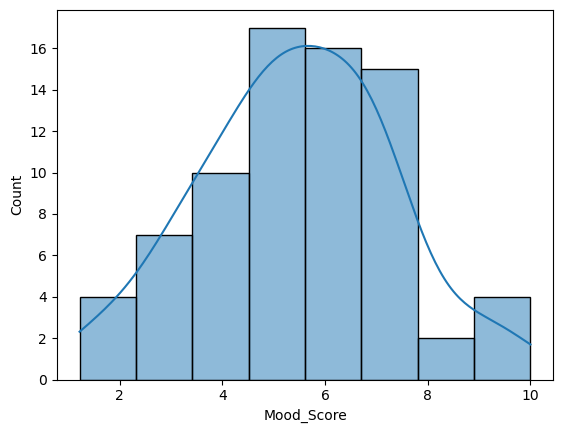

In [228]:
sns.histplot(df['Mood_Score'], kde = True)

In [229]:
# divide independent and independent features
x = df.iloc[:,:-1]

In [230]:
x.head()

,Sleep_Hours,Screen_Time_Hours,Exercise_Minutes,Social_Interaction_Hours,Food_Quality
0,7.7,7.6,24.0,3.3,1
1,6.8,6.2,25.0,2.1,4
2,8.0,5.4,10.0,0.7,2
3,9.3,6.2,23.0,1.1,5
4,6.6,2.0,24.0,2.8,1


In [231]:
x.shape

(75, 5)

In [232]:
y=df.iloc[:,-1]

In [233]:
y.head

<bound method NDFrame.head of 0     3.24
1     4.63
2     3.62
3     7.20
4     5.97
      ... 
70    8.06
71    6.14
72    7.31
73    6.82
74    6.37
Name: Mood_Score, Length: 75, dtype: float64>

In [234]:
y.shape

(75,)

In [235]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [236]:
x_train.shape

(60, 5)

In [237]:
x_train.head()

,Sleep_Hours,Screen_Time_Hours,Exercise_Minutes,Social_Interaction_Hours,Food_Quality
22,7.1,6.5,19.0,1.2,5
5,6.6,5.6,9.0,1.1,3
33,5.4,6.5,27.0,2.5,4
56,5.7,6.1,28.0,2.8,3
66,6.9,8.6,8.0,1.4,5


In [238]:
y_test.shape

(15,)

In [239]:
# standard scaling 

In [240]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [241]:
mean = scaler.mean_
std_dev = scaler.scale_
print(mean)
print(std_dev)

[ 6.89666667  6.10333333 22.33333333  1.94833333  3.06666667]
[ 1.48267401  1.81420016 14.70789659  1.15043349  1.48174072]


In [242]:
x_train

array([[ 1.37139608e-01,  2.18645481e-01, -2.26635625e-01,
        -6.50479439e-01,  1.30477168e+00],
       [-2.00088937e-01, -2.77440904e-01, -9.06542499e-01,
        -7.37403195e-01, -4.49921271e-02],
       [-1.00943745e+00,  2.18645481e-01,  3.17289875e-01,
         4.79529386e-01,  6.29889779e-01],
       [-8.07100319e-01, -1.83735698e-03,  3.85280562e-01,
         7.40300653e-01, -4.49921271e-02],
       [ 2.24819030e-03,  1.37618038e+00, -9.74533186e-01,
        -4.76631928e-01,  1.30477168e+00],
       [ 2.72031027e-01, -2.77440904e-01, -1.51845869e+00,
        -2.15860660e-01, -4.49921271e-02],
       [ 8.11596699e-01,  2.73766190e-01, -6.34579749e-01,
        -1.25894573e+00,  6.29889779e-01],
       [-9.41991737e-01,  9.90335414e-01,  6.57243312e-01,
        -4.20131486e-02, -4.49921271e-02],
       [-1.41411170e+00,  7.69852576e-01,  4.53271249e-02,
         2.18758119e-01,  1.30477168e+00],
       [-6.72208901e-01,  8.24973285e-01,  2.49299187e-01,
         1.52261446e+00

In [243]:
df.describe()

,Sleep_Hours,Screen_Time_Hours,Exercise_Minutes,Social_Interaction_Hours,Food_Quality,Mood_Score
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,6.826667,5.901333,22.253333,2.020000,2.986667,5.436267
std,1.434360,1.859417,13.972070,1.155948,1.502191,1.882824
min,3.100000,2.000000,0.000000,0.000000,1.000000,1.220000
25%,6.000000,4.750000,9.500000,1.200000,2.000000,4.320000
50%,6.800000,6.000000,24.000000,2.100000,3.000000,5.550000
75%,7.750000,6.850000,30.000000,2.800000,4.000000,6.820000
max,9.800000,10.900000,60.000000,4.600000,5.000000,10.000000


In [244]:
from sklearn.linear_model import LinearRegression

In [245]:
reg  = LinearRegression()

In [246]:
reg.fit(x_train,y_train)

LinearRegression()

In [247]:
print("coefficient :",reg.coef_)
print("intercept :",reg.intercept_)

coefficient : [ 0.72173104 -0.71738176  0.79561634  0.7004348   0.73597662]
intercept : 5.4448333333333325


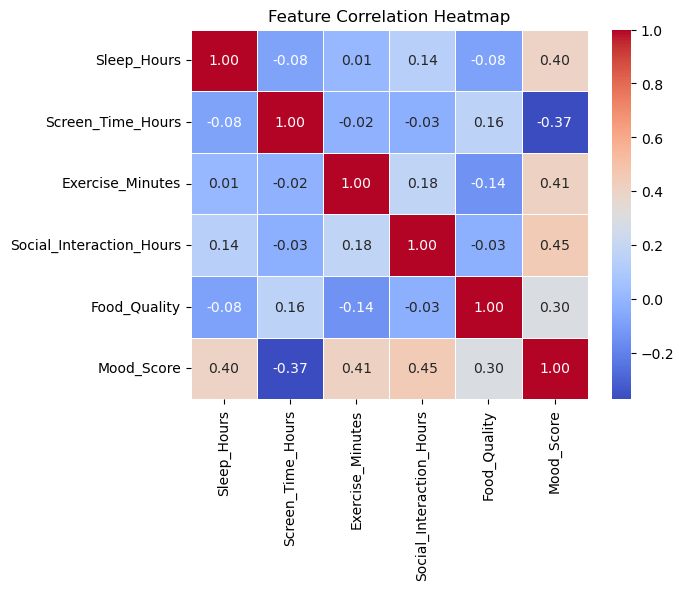

In [248]:
corr_matrix = df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [249]:
y_pred = reg.predict(x_test)
y_pred

array([6.50516937, 5.11953377, 4.14506309, 5.13066062, 5.959849  ,
       6.19590642, 7.11032975, 6.86410274, 4.52456287, 5.29075621,
       6.9141657 , 5.84418746, 3.01116225, 4.40250005, 8.05746304])

In [250]:
# evaluate metrics
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [251]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

1.0812102412674136
0.8413511918490468
1.0398125991097693


In [252]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print(r2)

0.5667908847176981


In [253]:
adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(adjusted_r2)

0.3261191540053081


In [254]:
error = y_test-y_pred
error

4    -0.535169
63    0.530466
10   -0.535063
0    -1.890661
35   -0.929849
61   -0.525906
28    1.869670
12    0.305897
69   -0.984563
64    0.329244
34   -0.984166
42    1.095813
49    0.018838
18    0.137500
9    -1.947463
Name: Mood_Score, dtype: float64

<Axes: xlabel='Mood_Score', ylabel='Density'>

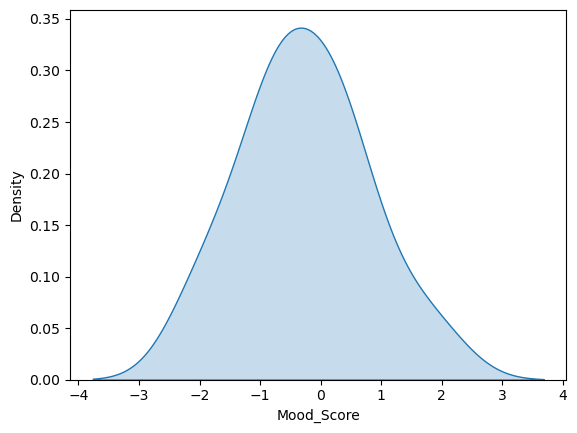

In [255]:
sns.kdeplot(error,fill=True)

In [256]:
# wrong way not scaling of features done
reg.predict([[5,4,3,2,5]])

array([13.65156319])

In [257]:
#  right way 
reg.predict(scaler.transform([[5,4,3,2,5]]))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([5.29920424])

In [259]:
import pickle

with open("mood_scorer.pkl", "wb") as model_file:
    pickle.dump(reg, model_file)